In [1]:
import json
import copy
with open('./all_dataset/anno/train.json', 'r') as file:
    train_data = json.load(file)

with open('./all_dataset/anno/val.json', 'r') as file:
    val_data = json.load(file)


In [2]:
train_data.keys()
train_data["categories"]

[{'supercategroy': 'person', 'id': 0, 'name': 'person'},
 {'supercategroy': 'vehicle', 'id': 1, 'name': 'car'},
 {'supercategroy': 'vehicle', 'id': 2, 'name': 'truck'},
 {'supercategroy': 'vehicle', 'id': 3, 'name': 'bus'},
 {'supercategroy': 'vehicle', 'id': 4, 'name': 'bicycle'},
 {'supercategroy': 'vehicle', 'id': 5, 'name': 'bike'},
 {'supercategroy': 'vehicle', 'id': 6, 'name': 'extra_vehicle'},
 {'supercategroy': 'animal', 'id': 7, 'name': 'dog'}]

In [3]:
train_data["annotations"][-1]

{'id': 50347,
 'image_id': 'train_7017',
 'bbox': [286, 238, 34, 59],
 'area': 2006,
 'category_id': 7,
 'segmentation': [],
 'iscrowd': 0}

In [4]:
val_data["annotations"]

[{'id': 1,
  'image_id': 'val_0',
  'bbox': [340, 206, 21, 37],
  'area': 777,
  'category_id': 1,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 2,
  'image_id': 'val_0',
  'bbox': [380, 211, 31, 47],
  'area': 1457,
  'category_id': 1,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 3,
  'image_id': 'val_0',
  'bbox': [229, 163, 26, 119],
  'area': 3094,
  'category_id': 0,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 4,
  'image_id': 'val_0',
  'bbox': [162, 151, 35, 136],
  'area': 4760,
  'category_id': 0,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 5,
  'image_id': 'val_0',
  'bbox': [245, 160, 46, 128],
  'area': 5888,
  'category_id': 0,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 6,
  'image_id': 'val_0',
  'bbox': [54, 168, 116, 106],
  'area': 12296,
  'category_id': 1,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 7,
  'image_id': 'val_0',
  'bbox': [556, 129, 83, 192],
  'area': 15936,
  'category_id': 1,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 8,
  'image_i

In [5]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

{'id': 2012, 'image_id': 'train_198', 'bbox': [82, 227, 50, 66], 'area': 3300, 'category_id': 5, 'segmentation': [], 'iscrowd': 0}


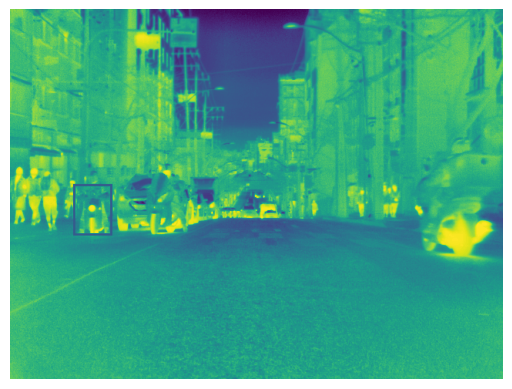

In [6]:
for idx,info in enumerate(train_data["annotations"]):
    if info["category_id"] == 5 and idx >2000:
        image_path = f'./all_dataset/train/{info["image_id"]}.png'
        bbox = info["bbox"]
        print(info)
        break
        
# 이미지 불러오기
image = Image.open(image_path)
bbox = (info["bbox"][0],info["bbox"][1],info["bbox"][0]+info["bbox"][2],info["bbox"][1]+info["bbox"][3])
# # # 바운딩 박스 좌표 설정 (왼쪽 위 모서리 x, 왼쪽 위 모서리 y, 오른쪽 아래 모서리 x, 오른쪽 아래 모서리 y)
# # bbox = (50, 50, 200, 200)  # 예시 좌표, 원하는 좌표로 변경
# print(bbox)
# # 이미지에 바운딩 박스 그리기
draw = ImageDraw.Draw(image)
draw.rectangle(bbox, outline="red", width=3)  # 바운딩 박스 색상은 빨강, 두께는 3픽셀

# # 이미지를 Jupyter Notebook에서 표시
plt.imshow(image)
plt.axis('off')  # 축을 숨깁니다
plt.show()

# 
# bike -> motorcycle

In [7]:
# import numpy as np
# np.load(image_path)

{'id': 699, 'image_id': 'train_77', 'bbox': [602, 201, 36, 56], 'area': 2016, 'category_id': 4, 'segmentation': [], 'iscrowd': 0}
(602, 201, 638, 257)


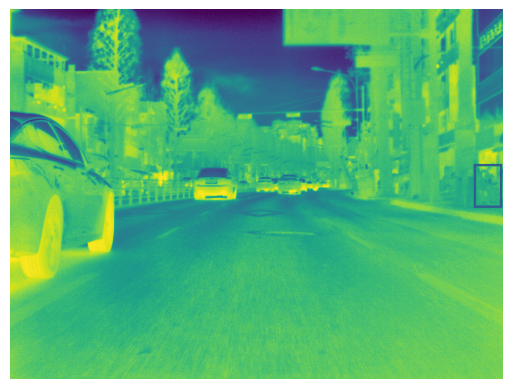

In [8]:
for idx,info in enumerate(train_data["annotations"]):
    if info["category_id"] == 4 and idx >500:
        image_path = f'./all_dataset/train/{info["image_id"]}.png'
        bbox = info["bbox"]
        print(info)
        break
        
# 이미지 불러오기
image = Image.open(image_path)
bbox = (info["bbox"][0],info["bbox"][1],info["bbox"][0]+info["bbox"][2],info["bbox"][1]+info["bbox"][3])
# # # 바운딩 박스 좌표 설정 (왼쪽 위 모서리 x, 왼쪽 위 모서리 y, 오른쪽 아래 모서리 x, 오른쪽 아래 모서리 y)
# # bbox = (50, 50, 200, 200)  # 예시 좌표, 원하는 좌표로 변경
print(bbox)
# # 이미지에 바운딩 박스 그리기
draw = ImageDraw.Draw(image)
draw.rectangle(bbox, outline="red", width=3)  # 바운딩 박스 색상은 빨강, 두께는 3픽셀

# # 이미지를 Jupyter Notebook에서 표시
plt.imshow(image)
plt.axis('off')  # 축을 숨깁니다
plt.show()
#bicycle -> 자전거

In [9]:
total_data = {}
total_data["images"] = copy.deepcopy(train_data["images"])
total_data["images"].extend(val_data["images"])
total_data["annotations"] = copy.deepcopy(train_data["annotations"])

for anno in val_data["annotations"]:
    anno["id"] += 50347
    total_data["annotations"].append(anno)

total_data["categories"] = copy.deepcopy(train_data["categories"])

In [10]:
len(total_data["images"])

7618

In [11]:
total_data["annotations"][-1]["id"]

54814

In [13]:
with open("/home/eslim/workspace/comp/all_dataset/total.json", "w") as file:
    json.dump(total_data, file, indent=4)

In [ ]:
##########FLIR v2 ######## https://www.kaggle.com/datasets/samdazel/teledyne-flir-adas-thermal-dataset-v2
# https://www.flir.com/oem/adas/adas-dataset-form/?srsltid=AfmBOopfUpMyajMTBoctol9RHmoCg42LUbWQ1v4aTdx6DPs1tcwKOqpg

In [12]:
import json
import copy
with open('./all_dataset/roboflow_data/train/_annotations.coco.json', 'r') as file:
    ext_train_data = json.load(file)

with open('./all_dataset/roboflow_data/valid/_annotations.coco.json', 'r') as file:
    ext_val_data = json.load(file)

{'id': 236, 'image_id': 28, 'category_id': 1, 'bbox': [340, 212, 33, 63.5], 'area': 2095.5, 'segmentation': [], 'iscrowd': 0}
./all_dataset/roboflow_data/train/FLIR_02547_jpeg.rf.945fb7fb67654641c09e02d70d93b4f0.jpg
(340, 212, 373, 275.5)


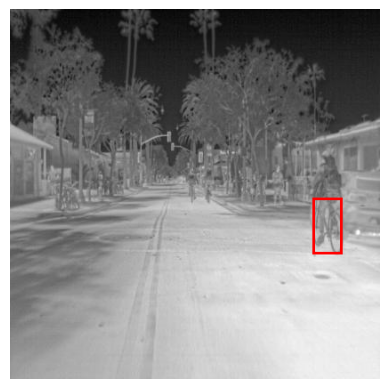

In [13]:
for idx,info in enumerate(ext_train_data["annotations"]):
    if info["category_id"] == 1 and idx >100:
#         image_path = f'./radar/extra/train/{info["image_id"]}.png'
        file_name = ext_train_data["images"][info["image_id"]]["file_name"]
#         print(ext_train_data["images"][info["category_id"]["image_id"]])
#         file_name = ext_train_data["images"][info["category_id"]["image_id"]]
        image_path = f'./all_dataset/roboflow_data/train/{file_name}'
        bbox = info["bbox"]
        print(info)
        break
print(image_path)
# 이미지 불러오기
image = Image.open(image_path)
bbox = (info["bbox"][0],info["bbox"][1],info["bbox"][0]+info["bbox"][2],info["bbox"][1]+info["bbox"][3])
# # # 바운딩 박스 좌표 설정 (왼쪽 위 모서리 x, 왼쪽 위 모서리 y, 오른쪽 아래 모서리 x, 오른쪽 아래 모서리 y)
# # bbox = (50, 50, 200, 200)  # 예시 좌표, 원하는 좌표로 변경
print(bbox)
# # 이미지에 바운딩 박스 그리기
draw = ImageDraw.Draw(image)
draw.rectangle(bbox, outline="red", width=3)  # 바운딩 박스 색상은 빨강, 두께는 3픽셀

# # 이미지를 Jupyter Notebook에서 표시
plt.imshow(image)
plt.axis('off')  # 축을 숨깁니다
plt.show()

# bicycle -> motorcycle같음

In [18]:
from mmengine import ConfigDict
from mmengine.config import Config, DictAction
import os

cfg = Config.fromfile('./mmdetection/configs/yolox/mymodel.py')
cfg.model = ConfigDict(**cfg.tta_model, module=cfg.model)
cfg.test_dataloader.dataset.pipeline = cfg.tta_pipeline
from mmdet.apis import DetInferencer


# checkpoint = "./work_dirs/yolox/extra/epoch_290.pth"
checkpoint = "./mmdetection/work_dirs/yolox/total/epoch_240.pth"

#42000

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(cfg, checkpoint, device)
# result = inferencer(os.path.join(test_dir_prefix,image_dir))

for idx,info in enumerate(ext_train_data["annotations"]):
#     if info["category_id"] == 1 and idx >100:
#         image_path = f'./radar/extra/train/{info["image_id"]}.png'
#         file_name = ext_train_data["images"][info["image_id"]]["file_name"]
#         print(ext_train_data["images"][info["category_id"]["image_id"]])
#         file_name = ext_train_data["images"][info["category_id"]["image_id"]]
        image_path = f'./all_dataset/roboflow_data/train/{file_name}'
        result = inferencer(image_path)
#         bbox = info["bbox"]
        print(result)
        break

# bicycle -> motorcycle같음

Loads checkpoint by local backend from path: ./mmdetection/work_dirs/yolox/total/epoch_240.pth


Output()

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their 
associated APIs are an experimental feature and subject to change. Please do not use them for anything important 
until they are released as stable. (Triggered internally at  
/opt/conda/conda-bld/pytorch_1623448265233/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)

{'predictions': [{'labels': [2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 0, 5, 2, 0, 0, 6, 0, 0, 7, 0, 1, 0, 0, 2, 0, 0, 3, 2, 0, 0, 0, 2, 0, 1, 6, 0, 1, 1, 7, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 6, 4, 2, 2, 7, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 7, 0, 0, 6, 0, 2, 0, 1, 5, 7, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0], 'scores': [0.863243579864502, 0.8581986427307129, 0.8407606482505798, 0.826693594455719, 0.7262395620346069, 0.6953878402709961, 0.62103271484375, 0.5398709177970886, 0.5007721781730652, 0.4966205954551697, 0.48152726888656616, 0.480709046125412, 0.4498826265335083, 0.448929101228714, 0.4428369998931885, 0.3426153361797333, 0.3271934688091278, 0.3100948631763458, 0.298016756772995, 0.246087908744812, 0.23830005526542664, 0.22773736715316772, 0.2023707926273346, 0.19844472408294678, 0.19752401113510132, 0.1777467280626297, 0.1744728684425354, 0.17404693365097046, 0.16367995738983154, 0.16091544926166534, 0.16043026745319366, 0.1580226570367813, 0.1519331634044647

In [16]:
ext_train_data.keys()
# ext_train_data["annotations"]
# ext_train_data["images"]
ext_train_data["categories"]

[{'id': 1, 'name': 'bicycle'},
 {'id': 2, 'name': 'car'},
 {'id': 3, 'name': 'person'}]

In [17]:
# ext_val_data["annotations"]

In [18]:
__MAP__ = {
    1:4,
    2:1,
    3:0,

}



In [19]:
ext_train_data["annotations"][-1]

{'id': 67604,
 'image_id': 8859,
 'category_id': 2,
 'bbox': [386, 190, 29, 26],
 'area': 754,
 'segmentation': [],
 'iscrowd': 0}

In [20]:
for info in ext_train_data["images"]:
    total_data["images"].append({'file_name': info["file_name"], 'height': info["height"], 'width':  info["width"], 'id': "ext_t_"+str(info["id"])})

    
    
for info in ext_val_data["images"]:
    total_data["images"].append({'file_name': info["file_name"], 'height': info["height"], 'width':  info["width"], 'id': "ext_v_"+str(info["id"])})


In [21]:
for idx,info in enumerate(ext_train_data["annotations"]):
    if info["category_id"] in __MAP__.keys():
        try:
            total_data["annotations"].append({'id': 54814+info["id"]+1,
              'image_id': "ext_t_"+str(info["image_id"]),
              'bbox': info["bbox"],
              'area': info["area"],
              'category_id': __MAP__[info["category_id"]],
              'segmentation': [],
              'iscrowd': 0})
        except:
            print(idx)

In [22]:
total_data["annotations"][-1]["id"]


122419

In [23]:
for idx,info in enumerate(ext_val_data["annotations"]):
    if info["category_id"] in __MAP__.keys():
        try:
            total_data["annotations"].append({'id': 122419+info["id"]+1,
              'image_id': "ext_v_"+str(info["image_id"]),
              'bbox': info["bbox"],
              'area': info["area"],
              'category_id': __MAP__[info["category_id"]],
              'segmentation': [],
              'iscrowd': 0})
        except:
            print(idx)

In [24]:
total_data["annotations"][-1]["id"]


134096

In [25]:
total_data["images"][-10:]

[{'file_name': 'FLIR_10055_jpeg.rf.fca8a33787eb4d0a3290dcbb82b97aaf.jpg',
  'height': 416,
  'width': 416,
  'id': 'ext_v_1355'},
 {'file_name': 'FLIR_09900_jpeg.rf.fcc0c4d04d7634fb52e98816420c9a89.jpg',
  'height': 416,
  'width': 416,
  'id': 'ext_v_1356'},
 {'file_name': 'FLIR_09602_jpeg.rf.fccafd1c052906ccf6c78dba432cd7a5.jpg',
  'height': 416,
  'width': 416,
  'id': 'ext_v_1357'},
 {'file_name': 'FLIR_10000_jpeg.rf.fedcce868b1155b697fb25bccaa9e114.jpg',
  'height': 416,
  'width': 416,
  'id': 'ext_v_1358'},
 {'file_name': 'FLIR_09527_jpeg.rf.fe81153f21a2591196cfcdbd0eeb365e.jpg',
  'height': 416,
  'width': 416,
  'id': 'ext_v_1359'},
 {'file_name': 'FLIR_09102_jpeg.rf.ff2ebb0feec9d8aa8094b141f92dd346.jpg',
  'height': 416,
  'width': 416,
  'id': 'ext_v_1360'},
 {'file_name': 'FLIR_09007_jpeg.rf.ff78eb30994dbe6c262d8fdce5ed7589.jpg',
  'height': 416,
  'width': 416,
  'id': 'ext_v_1361'},
 {'file_name': 'FLIR_09600_jpeg.rf.ff366eb8ff1aba1c2be7985446454e6c.jpg',
  'height': 416,

In [26]:
# total_data["annotations"][-100:]

In [28]:
with open("/home/eslim/workspace/comp/all_dataset/total_extra.json", "w") as file:
    json.dump(total_data, file, indent=4)

In [ ]:
###############v7

In [ ]:
import json
import copy
with open('./radar/extra/v7/train/_annotations.coco.json', 'r') as file:
    ext2_train_data = json.load(file)

with open('./radar/extra/v7/valid/_annotations.coco.json', 'r') as file:
    ext2_val_data = json.load(file)

In [ ]:
ext2_train_data.keys()
# ext2_train_data["images"]
ext2_train_data["categories"]
# ext2_train_data["annotations"]

In [ ]:
__MAP__ = {
    1:4,
    2:1,
    3:7,
    4:0,
}


In [ ]:
for info in ext_train_data["images"]:
    total_data["images"].append({'file_name': info["file_name"], 'height': info["height"], 'width':  info["width"], 'id': "ext2_t_"+str(info["id"])})

    
    
for info in ext_val_data["images"]:
    total_data["images"].append({'file_name': info["file_name"], 'height': info["height"], 'width':  info["width"], 'id': "ext2_v_"+str(info["id"])})


In [ ]:
for idx,info in enumerate(ext_train_data["annotations"]):
    if info["category_id"] in __MAP__.keys():
        try:
            total_data["annotations"].append({'id': 134096+info["id"]+1,
              'image_id': "ext2_t_"+str(info["image_id"]),
              'bbox': info["bbox"],
              'area': info["area"],
              'category_id': __MAP__[info["category_id"]],
              'segmentation': [],
              'iscrowd': 0})
        except:
            print(idx)

In [ ]:
total_data["annotations"][-1]["id"]

In [ ]:
for idx,info in enumerate(ext_val_data["annotations"]):
    if info["category_id"] in __MAP__.keys():
        try:
            total_data["annotations"].append({'id': 201701+info["id"]+1,
              'image_id': "ext2_v_"+str(info["image_id"]),
              'bbox': info["bbox"],
              'area': info["area"],
              'category_id': __MAP__[info["category_id"]],
              'segmentation': [],
              'iscrowd': 0})
        except:
            print(idx)

In [ ]:
total_data["annotations"][-1]["id"]

In [ ]:
with open("/home/eslim/workspace/comp/radar/datasets/total_extra_2.json", "w") as file:
    json.dump(total_data, file, indent=4)

In [ ]:
# [{'supercategroy': 'person', 'id': 0, 'name': 'person'},
#  {'supercategroy': 'vehicle', 'id': 1, 'name': 'car'},
#  {'supercategroy': 'vehicle', 'id': 2, 'name': 'truck'},
#  {'supercategroy': 'vehicle', 'id': 3, 'name': 'bus'},
#  {'supercategroy': 'vehicle', 'id': 4, 'name': 'bicycle'},
#  {'supercategroy': 'vehicle', 'id': 5, 'name': 'bike'},
#  {'supercategroy': 'vehicle', 'id': 6, 'name': 'extra_vehicle'},
#  {'supercategroy': 'animal', 'id': 7, 'name': 'dog'}]



#   "categories": [
#     {
#       "id": 1,
#       "name": "bicycle"
#     },
#     {
#       "id": 2,
#       "name": "car"
#     },
#     {
#       "id": 3,
#       "name": "person"
#     }
#   ],